<a href="https://colab.research.google.com/github/Anghely22/Estadistica-1/blob/main/Parte_practica_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PARTE PRACTICA TERCER PARCIAL


*   Anghely Efftefania Jimenez Baez - 2203039
*   Johan Smith Salazar Giraldo - 2211517
*   Diego Alonso Santiago Villar - 2211631






# Introducción
El presente informe analiza dos variables cruciales en el estudio de los nacidos vivos en Colombia: el tiempo de gestación y la talla al nacer. Estas variables son indicadoras de la salud perinatal y pueden proporcionar información valiosa sobre los factores que influyen en el desarrollo prenatal.

El tiempo de gestación y la talla al nacer se examinan a través de gráficos estadísticos detallados que permiten visualizar la variabilidad y detectar posibles valores atípicos. Además, se estudia la relación entre estas variables para evaluar si existe una asociación significativa entre ellas. Este análisis incluye diagramas de barras y circulares y el cálculo de coeficientes de correlación para ofrecer una visión completa de la interacción entre el tiempo de gestación y la talla al nacer.

Los resultados obtenidos en este informe no solo identifican patrones relevantes en estas variables, sino que también contribuyen a una mejor comprensión de sus interacciones. Esta información puede servir como base para futuras investigaciones y para el desarrollo de políticas de salud pública más efectivas en Colombia.

In [ ]:
from google.colab import files
import pandas as pd
import io
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats


# Estadistica descriptiva para variables cualitativas


*   Graficos para datos de una variable cualitativa
*   Proporciones asociadas a los valores de una variable cualitativa

In [ ]:
uploaded = files.upload()

Saving asriosgu_nac2020 (3).csv to asriosgu_nac2020 (3) (1).csv


In [ ]:
io_csv = io.BytesIO(uploaded['asriosgu_nac2020 (3).csv'])
tabla = pd.read_csv(io_csv, sep = ",", index_col=0, encoding='latin-1')
tabla.head(3)

,COD_MUNIC,AREANAC,SIT_PARTO,OTRO_SIT,SEXO,PESO_NAC,TALLA_NAC,ANO,MES,ATEN_PAR,...,AREA_RES,N_HIJOSV,FECHA_NACM,N_EMB,SEG_SOCIAL,IDCLASADMI,EDAD_PADRE,NIV_EDUP,ULTCURPAD,PROFESION
COD_DPTO,,,,,,,,,,,,,,,,,,,,,
44,560,3,2,NaN,2,9,9,2020,11,5,...,3.0,1,NaN,1,2,2.0,20,99,99,5
44,560,3,2,NaN,1,9,9,2020,10,5,...,3.0,1,NaN,1,2,2.0,20,99,99,5
44,560,3,2,NaN,1,9,9,2020,10,5,...,3.0,1,NaN,1,2,2.0,20,99,99,5


In [ ]:
tabla1 = tabla[["T_GES", "TALLA_NAC"]]
tabla1.head(4)

,T_GES,TALLA_NAC
COD_DPTO,,
44,6,9
44,6,9
44,6,9
44,6,9


In [ ]:
df2 = tabla1[(tabla1.T_GES != 9) & (tabla1["TALLA_NAC"] != 9)]
df2.head(4)

,T_GES,TALLA_NAC
COD_DPTO,,
52,4,4
20,4,5
27,4,5
27,4,4


In [ ]:
df2.T_GES.head(2)
df2.T_GES = df2.T_GES.astype(str)
df2.T_GES.head(2)

<ipython-input-6-e608aef629bf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.T_GES = df2.T_GES.astype(str)


COD_DPTO
52    4
20    4
Name: T_GES, dtype: object

In [ ]:
df2.TALLA_NAC.head(2)
df2.TALLA_NAC = df2.TALLA_NAC.astype(str)
df2.TALLA_NAC.head(2)

<ipython-input-7-4ae3ab049010>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.TALLA_NAC = df2.TALLA_NAC.astype(str)


COD_DPTO
52    4
20    5
Name: TALLA_NAC, dtype: object

In [ ]:
df2.loc[(df2.T_GES == "1"), "T_GES"], df2.loc[(df2.T_GES == "2"),'T_GES'] = "1-22", "22-27"
df2.loc[(df2.T_GES == "3"), 'T_GES'], df2.loc[(df2.T_GES == "4"),'T_GES']= "28-37","38-41"
df2.loc[(df2.T_GES == "5"),'T_GES'], df2.loc[(df2.T_GES == "6"),'T_GES']= ">42 ", "Ignorado"
df2.loc[(df2.T_GES == "9"),'T_GES'] = "NA"
df2.head(5)

,T_GES,TALLA_NAC
COD_DPTO,,
52,38-41,4
20,38-41,5
27,38-41,5
27,38-41,4
27,38-41,5


In [ ]:
df2.loc[(df2.TALLA_NAC == "1"), "TALLA_NAC"], df2.loc[(df2.TALLA_NAC == "2"),'TALLA_NAC'] = "1-19", "20-29"
df2.loc[(df2.TALLA_NAC == "3"), 'TALLA_NAC'], df2.loc[(df2.TALLA_NAC == "4"),'TALLA_NAC']= "30-39","40-49"
df2.loc[(df2.TALLA_NAC == "5"),'TALLA_NAC'], df2.loc[(df2.TALLA_NAC == "6"),'TALLA_NAC'],df2.loc[(df2.TALLA_NAC == "9"),'TALLA_NAC'] = "50-59", ">60","NA"
df2.head(5)

,T_GES,TALLA_NAC
COD_DPTO,,
52,38-41,40-49
20,38-41,50-59
27,38-41,50-59
27,38-41,40-49
27,38-41,50-59


In [ ]:
sizes = np.array(y_values1)
sizes

array([485433, 130485,   2236,   1482,   1163,     28])

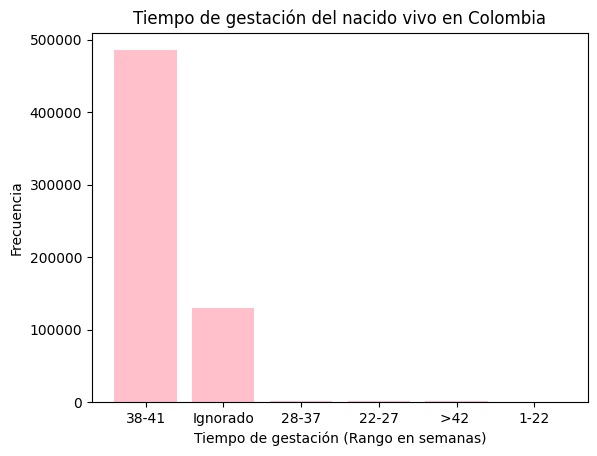

In [ ]:
x_values1 = df2.T_GES.unique()
y_values1 = df2.T_GES.value_counts().tolist()
plt.bar(x_values1, y_values1, color = "pink")
plt.title('Tiempo de gestación del nacido vivo en Colombia')
ax = plt.subplot()  # Axis
ax.set_xlabel('Tiempo de gestación (Rango en semanas)')
ax.set_ylabel('Frecuencia')
plt.show()

Esta gráfica representa el tiempo de gestacion que presenta un recien nacido, el valor de 38 a 41 semanas es el rango donde se tienen más nacimientos con un valor de 485433 bebés nacidos en Colombia.El rango de datos ignorados corresponde a 130485 y tambien se tienen que los rangos de 1-22 semanas,de 22-27 semanas, de 28-37 semanas y finalmente >42 tienen menos de 2300 bebés nacidos en Colombia.

In [ ]:
sizes = np.array(y_values2)
sizes

array([361444, 253072,   5716,    478,    115,      2])

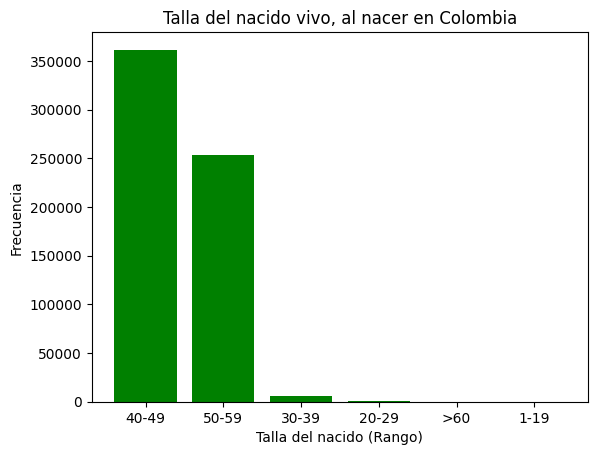

In [ ]:
x_values2 = df2.TALLA_NAC.unique()
y_values2 = df2.TALLA_NAC.value_counts().tolist()
plt.bar(x_values2, y_values2, color = "green")
plt.title('Talla del nacido vivo, al nacer en Colombia')
ax = plt.subplot()  # Axis
ax.set_xlabel('Talla del nacido (Rango)')
ax.set_ylabel('Frecuencia')
plt.show()

Esta gráfica representa la longitud de un recien nacido en Colombia, se observa que de 40 a 49 centimentros es el rango más común con aproximadamente 360000 recién nacidos en Colombia. En el rango de 50 a 59 centimetros se tienen aproximadamente 250000 recien nacidos en Colombia. Los rangos de 30 a 39 centimetros, de 20 a 29 centimetros,de 60 a 79 centimetros y de 1 a 19 centimetros tienen menos de 25000 recién nacidos en Colombia.

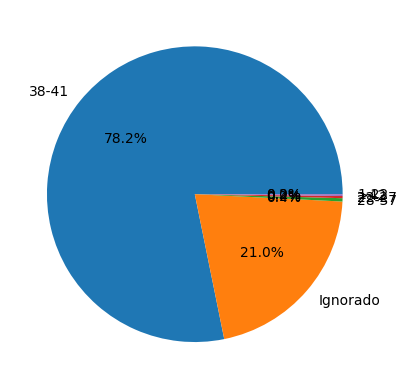

In [ ]:
plt.pie(y_values1, labels = x_values1, autopct='%1.1f%%')
plt.show()

In [ ]:
len(df2.T_GES)

620827

In [ ]:
porcentaje = [(x/len(df2.T_GES)*100) for x in y_values1]
print(x_values1)
print(porcentaje)

['38-41' 'Ignorado' '28-37' '22-27' '>42 ' '1-22']
[78.19134799227481, 21.017932531929183, 0.3601647479893754, 0.23871384459760933, 0.18733077008570825, 0.004510113123301661]


Este diagrama circular representa en porcentajes el tiempo de gestación de un bebé, aproximadamente el 78.19% de los bebés en Colombia nacen entre 38 y 41 semanas, el 21.01% pertenece al ignorado, el 0.36% entre 28 y 37 semanas, el 0.23% entre 22 y 27 semanas, el 0.18% entre 42 y 60 semanas y el 0.0045% entre 1 y 22 semanas.

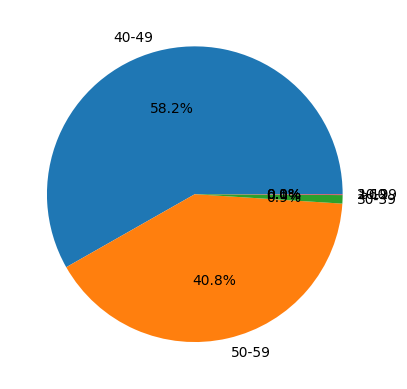

In [ ]:
plt.pie(y_values2, labels = x_values2, autopct='%1.1f%%')
plt.show()

In [ ]:
len(df2.TALLA_NAC)

620827

In [ ]:
porcentaje = [(x/len(df2.TALLA_NAC)*100) for x in y_values2]
print(x_values2)
print(porcentaje)

['40-49' '50-59' '30-39' '20-29' '>60' '1-19']
[58.21976170495162, 40.76369101214992, 0.9207073790282962, 0.07699407403350692, 0.018523678899274677, 0.00032215093737869]


Este diagrama circular representa la longitud de un recién nacido en Colombia, aproximadamente el 58.21% de recién nacidos en Colombia están en un rango entre 40 y 49 centimetros, el 40.76% están en un rango entre 50 y 59 centimetros, el 0.92% están en un rango entre 30 y 39 centimetros, el 0.076% están en un rango entre 20 y 29 centimetros, el 0.018% están en un rango entre 60 y 79 centimetros y el 0.00032% están en un rango entre 1 y 19 centimetros.

A continuacion se va a representar las tablas de contingencia de las variables aleatorias.

In [ ]:
df2.loc[(df2.TALLA_NAC == 1), "TALLA_NAC"], df2.loc[(df2.TALLA_NAC == 2), "TALLA_NAC"], df2.loc[(df2.TALLA_NAC == 3), "TALLA_NAC"] = "1-19", "20-29", "30-39"
df2.loc[(df2.TALLA_NAC == 4), "TALLA_NAC"], df2.loc[(df2.TALLA_NAC == 5), "TALLA_NAC"],df2.loc[(df2.TALLA_NAC == 6), "TALLA_NAC"] = "40-49", "50-59", ">60"
df2.loc[(df2.TALLA_NAC == 9), "TALLA_NAC"] = "NA"
df2.loc[(df2.T_GES == 1), "T_GES"], df2.loc[(df2.T_GES == 2), "T_GES"], df2.loc[(df2.T_GES == 3), "T_GES"] = "1-22", "22-27", "28-37"
df2.loc[(df2.T_GES == 4), "T_GES"], df2.loc[(df2.T_GES == 5), "T_GES"], df2.loc[(df2.T_GES == 6), "T_GES"] = "38-41", ">42", "Ignorado"
df2.loc[(df2.T_GES == 9), "T_GES"]  = "NA"
df2.TALLA_NAC, df2.T_GES = df2.TALLA_NAC.astype(str), df2.T_GES.astype(str)
df2.head(3)

<ipython-input-22-eb12a2d9f266>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.TALLA_NAC, df2.T_GES = df2.TALLA_NAC.astype(str), df2.T_GES.astype(str)


,T_GES,TALLA_NAC
COD_DPTO,,
52,38-41,40-49
20,38-41,50-59
27,38-41,50-59


In [ ]:
tabla_cont = pd.crosstab(df2.TALLA_NAC, df2["T_GES"])
tabla_cont

T_GES,1-22,22-27,28-37,38-41,>42,Ignorado
TALLA_NAC,,,,,,
1-19,0,2,0,0,0,0
20-29,22,260,53,76,0,67
30-39,6,1872,3619,198,0,21
40-49,0,102,89212,162543,256,959
50-59,0,0,37593,322515,902,434
>60,0,0,8,101,5,1


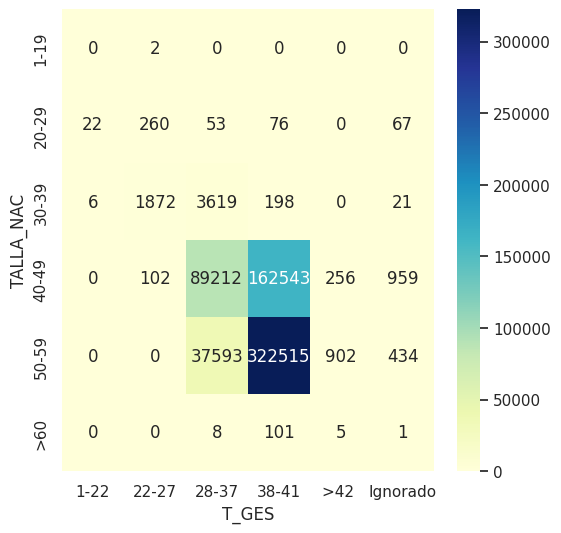

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(6, 6))
heatmap = sns.heatmap(tabla_cont,  annot=True, fmt='d', cmap='YlGnBu', cbar=True)
plt.show()

Según lo que podemos observar en la tabla de contingencia, podemos calcular las siguientes probabilidades:


*   $P(\text{20-29}| \text{Ignorado} )$

La probabilidad de que un recién nacido sea de talla baja sabiendo que el tiempo de gestación es ignorado corresponde al valor de 4.52%.

*   $P(\text{40-49}| \text{Ignorado} )$

La probabilidad de que un recién nacido sea de talla media sabiendo que el tiempo de gestación es ignorado corresponde al valor de 64.7%.

*   $P(\text{50-59}| \text{Ignorado} )$

La probabilidad de que un recién nacido sea de talla alta sabiendo que el tiempo de gestación es ignorado corresponde al valor de 29.28%.

Ahora bien, se puede calcular diferentes probabilidades dependiendo la necesidad. Otro ejemplo de ello, es el siguiente:



*  $P(\text{38-41}∩\text{40-49} )$

La probabilidad de que un recién nacido tenga de 38-41 semanas de gestación y que la talla es de 40-49 centímetros corresponde al valor de 26.18%.








In [ ]:
res = stats.chi2_contingency(tabla_cont)
chi, valor_p, _, _ = res
print(f"El valor de la estadística Chi cuadrado es {chi} y el valor p es {valor_p}")

El valor de la estadística Chi cuadrado es 299847.066622687 y el valor p es 0.0




Como el valor p $=0.0 < 0.05$ se rechaza la hipótesis nula, es decir, no se rechaza con una confianza del 95% que la talla de nacimiento y el tiempo de gestación estén asociados para los individuos recién nacidos en Colombia.

In [ ]:
import math
coeficiente_contingencia = math.sqrt(chi/(chi + len(df2.TALLA_NAC)))
coeficiente_phi = math.sqrt(chi/len(df2.TALLA_NAC))
coeficiente_v_cramer = math.sqrt(chi/(len(df2.TALLA_NAC)*min(4-1, 2-1)))
print(f"Los coeficientes de contingencia, Chi,Phi y V de Cramer están respectivamente dados por {coeficiente_contingencia}, {coeficiente_phi} y {coeficiente_v_cramer}")


Los coeficientes de contingencia, Chi,Phi y V de Cramer están respectivamente dados por 0.5706856432960946, 0.6949676740063135 y 0.6949676740063135


Para la interpretación de los coeficientes de contigencia nos ayudaremos de la referencia:

El artículo Landis, J. R., & Koch, G. G. (1977). The measurement of observer agreement for categorical data. biometrics, 159-174,[Link](https://www.jstor.org/stable/2529310).

Donde ______= nula ($Chi, \phi, V ≈ 0$), ______ = insignificantemente ($0 < Chi, \phi, V < 0.2$), ______ = discretamente ($0.2 < Chi, \phi, V < 0.4$), ______ = moderadamente ($0.4 < Chi, \phi, V < 0.6$) ______ = sustancialmente ($0.6 < Chi, \phi, V < 0.8$) y ______ = fuertemente ($0.8 < Chi, \phi, V < 1$)

De acuerdo con los coeficientes de contingencia de Chi, phi y V de Cramer se determina que el tiempo de gestación y la talla de nacimiento de un recién nacido en Colombia están sustancialmente asociados, es decir, X y Y están sustancialmente asociadas.





# Conclusiones
Al analizar las variables "Tiempo de gestación de un recién nacido" y "Talla de nacimiento de un recién nacido" en Colombia, se pueden observar diferentes patrones y relaciones entre estos factores demográficos.

El tiempo de gestación de un recién nacido en Colombia muestra que la mayoría de los nacidos vivos son a término, es decir, se presentan más nacimientos entre la semana 38-41, vemos que tambien hay una gran cantidad de bebes en el rango de ignorados y un bajo porcentaje en el resto de semanas.

Por otro lado, la variable talla de nacimiento de un nacido vivo en Colombia, muestra una distribución en la que la longitud más frecuente de un bebé al nacer esta entre los 40-49 centímetros, con una frecuencia absoluta de 58.21%. Podemos decir que la dispersión en la gráfica de barras es probablemente moderada, con una distribución uniforme de los puntos y ausencia de valores atípicos.

Al examinar la relación entre estas dos variables, se observa que las variables están sustancialmente asociadas, significa que existe una relación significativa entre las variables que están siendo analizadas. Además, como el p-valor es menor que 0.05 decimos que se rechaza la hipótesis nula y que hay una asociación significativa entre las variables.


# Referencias
Departamento Administrativo Nacional de Estadística. (2020 - 2022). Encuesta Nacional de Calidad de Vida 2020: Nacimiento y defunción (nac2020). DANE. https://microdatos.dane.gov.co/index.php/catalog/732/study-description
